In this notebook, we're going to explore an image dataset containing benign and malignant skin lesions. The data is taken from a competition published by the [International Skin Imaging Collaboration (ISIC)](https://challenge.isic-archive.com/data/) in 2016.

# Important: Run this code cell each time you start a new session!

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install os
!pip install opencv-python
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import sklearn

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [2]:
!wget -Ncnp https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Training_Data.zip

--2024-07-03 23:20:06--  https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Training_Data.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.216.38.113, 52.216.144.91, 52.216.42.57, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.216.38.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 631625308 (602M) [application/zip]
Saving to: ‘ISBI2016_ISIC_Part3_Training_Data.zip’

ISBI2016_ISIC_Part3 100%[===================>] 602.36M  62.8MB/s    in 9.8s    

2024-07-03 23:20:16 (61.3 MB/s) - ‘ISBI2016_ISIC_Part3_Training_Data.zip’ saved [631625308/631625308]



In [3]:
!unzip -n ISBI2016_ISIC_Part3_Training_Data.zip

Archive:  ISBI2016_ISIC_Part3_Training_Data.zip
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000000.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000001.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000002.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000004.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000006.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000007.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000008.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000009.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000010.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000011.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000016.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000017.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000018.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000019.jpg  
 extracting: ISBI2016_ISIC_P

In [4]:
!wget -Ncnp https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Training_GroundTruth.csv

--2024-07-03 23:20:27--  https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Training_GroundTruth.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 16.182.101.161, 3.5.17.214, 52.217.106.100, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|16.182.101.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19419 (19K) [text/csv]
Saving to: ‘ISBI2016_ISIC_Part3_Training_GroundTruth.csv’

ISBI2016_ISIC_Part3 100%[===================>]  18.96K  --.-KB/s    in 0s      

2024-07-03 23:20:27 (45.7 MB/s) - ‘ISBI2016_ISIC_Part3_Training_GroundTruth.csv’ saved [19419/19419]



In [5]:
!wget -Ncnp https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part1_Training_GroundTruth.zip

--2024-07-03 23:20:27--  https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part1_Training_GroundTruth.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 16.182.101.161, 3.5.17.214, 52.217.106.100, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|16.182.101.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6000606 (5.7M) [application/zip]
Saving to: ‘ISBI2016_ISIC_Part1_Training_GroundTruth.zip’

ISBI2016_ISIC_Part1 100%[===================>]   5.72M  --.-KB/s    in 0.1s    

2024-07-03 23:20:28 (58.6 MB/s) - ‘ISBI2016_ISIC_Part1_Training_GroundTruth.zip’ saved [6000606/6000606]



In [6]:
!unzip -n ISBI2016_ISIC_Part1_Training_GroundTruth.zip

Archive:  ISBI2016_ISIC_Part1_Training_GroundTruth.zip
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000000_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000001_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000002_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000004_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000006_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000007_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000008_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000009_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000010_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000011_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000016_Segmentation.png  

# Overview of the Dataset

Skin cancer is caused by the uncontrolled growth of abnormal skin cells. There are several types of skin cancer, including basal cell carcinoma, squamous cell carcinoma, and melanoma. Regular self-examinations of the skin and annual skin checks with a dermatologist are crucial for early detection and treatment of skin cancer. However, even the most diligent poeple can struggle to discern malignant and benign skin lesions.

The overarching goal of the ISIC 2016 Challenge was to develop image analysis tools that automatically diagnose of melanoma from dermoscopic images. The dataset is composed of the following components which we have already downloaded:

| Folder / File | Explanation |
|:---------------|:-------------|
|`ISBI2016_ISIC_Part3_Training_Data` | This folder contains a collection of of 1022 $\times$ 767 px (w $\times$ h) images gathered from distinct patients. The images files are named according to the following convention: `ISIC_{image_id}.jpg` (e.g., `ISIC_0000001.jpg`)|
| `ISBI2016_ISIC_Part3_Training_GroundTruth.csv` | Each image was determined to be benign or malignant based on the judgment of a dermatologist, and this file holds those determinations. |
| `ISBI2016_ISIC_Part1_Training_GroundTruth` | To save us time in analyzing the images, we are going to take advantage  

In [7]:
# The relevant folders and files associated with this dataset
image_folder = 'ISBI2016_ISIC_Part3_Training_Data'
diagnosis_filename = 'ISBI2016_ISIC_Part3_Training_GroundTruth.csv'
segmentation_folder = 'ISBI2016_ISIC_Part1_Training_GroundTruth'

In this notebook, we are going to see if we can extract useful information from the images to help us discriminate benign skin lesions from malignant ones.

# Inspecting the Dataset

Before we start trying to extract information from our images, let's look at hand-selected examples of a benign skin lesion and a malignant skin lesion to see what we are working with.

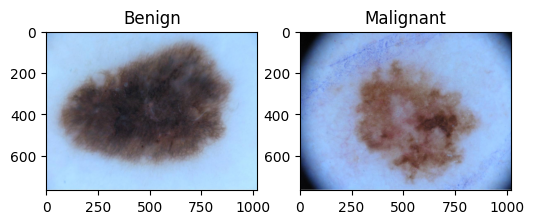

In [8]:
# Load two pre-selected image files to show what they look like
benign_filename = 'ISIC_0000000.jpg'
malignant_filename = 'ISIC_0000002.jpg'
benign_img = cv2.imread(os.path.join(image_folder, benign_filename))
benign_img = cv2.cvtColor(benign_img, cv2.COLOR_BGR2RGB)
malignant_img = cv2.imread(os.path.join(image_folder, malignant_filename))
malignant_img = cv2.cvtColor(malignant_img, cv2.COLOR_BGR2RGB)

# Show the images and their labels
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1), plt.imshow(benign_img), plt.title('Benign')
plt.subplot(1, 2, 2), plt.imshow(malignant_img), plt.title('Malignant')
plt.show()

Properly segmenting a skin lesion from a image is difficult for multiple reasons:
* Skin lesions can be red, brown, black, or purple, so a single color filter won't suffice
* People can have different skin tones, so a dynamic brightness threshold wouldn't work either
* Hair can cover skin lesions and make it more difficult to accurately detect edges

We are going to skip this step and rely on image annotations provided by the ISIC challenge organizers. These annotations indicate where the skin lesion is according to a binary image where white pixels belong to the skin lesion and black pixels correspond to everything else.

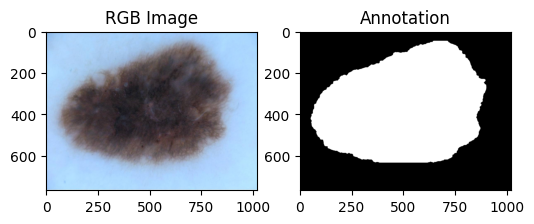

In [9]:
# Load the corresponding segmentation file
benign_seg_filename = benign_filename[:-4] + '_Segmentation.png'
benign_seg_img = cv2.imread(os.path.join(segmentation_folder, benign_seg_filename))
benign_seg_img = cv2.cvtColor(benign_seg_img, cv2.COLOR_BGR2GRAY)
malignant_seg_filename = malignant_filename[:-4] + '_Segmentation.png'
malignant_seg_img = cv2.imread(os.path.join(segmentation_folder, malignant_seg_filename))
malignant_seg_img = cv2.cvtColor(malignant_seg_img, cv2.COLOR_BGR2GRAY)

# Show the image with its annotation
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1), plt.imshow(benign_img), plt.title('RGB Image')
plt.subplot(1, 2, 2), plt.imshow(benign_seg_img, cmap='gray'), plt.title('Annotation')
plt.show()

To extract the contour from the image on the right, all we need to do is call `cv2.findContours()` and return the first (and only) contour from the list:

In [10]:
def extract_contour(seg_img):
    """
    Extracts the lone contour from the image annotation
    seg_img: a binary image representing an annotation
    """
    cnts, hierarchy = cv2.findContours(seg_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return cnts[0]

# Extracting Information from an Image

Knowing the image processing techniques we've covered can only take us so far in extracting useful information from our images. Combining our understanding of image processing with some knowledge about dermatology will guide our analysis procedure and ultimately lead to a data science pipeline that is more interpretable for everyone.

We are going to use the ABCDE rule of dermatology to guide how we process our images. This rule is a handy tool that dermatologists use to visually screen for potential signs of melanoma. It stands for:

* **Asymmetry (A):** Melanomas are often asymmetric, meaning one half of the mole or lesion does not mirror the other half.
* **Border (B):** Melanomas typically have irregular, ragged, or blurred borders, rather than smooth and well-defined edges.
* **Color (C):** Melanomas often exhibit a variety of colors within the same lesion, such as different shades of brown, black, red, or blue.
* **Diameter (D):** Melanomas tend to be larger in size compared to benign moles. Although the exact threshold may vary, a diameter greater than 6 millimeters is often considered a warning sign.
* **Evolution (E):** Any significant change in size, shape, color, or texture of a mole or lesion over time should be closely monitored.

We will only be looking a single image of each skin lesion, so we will only be able to extract features representing the first four components of the rule.

Knowing how to translate these English explanations into code is a difficult skill that comes with practice, exposure to a diverse toolbox of techniques, and a healthy amount of internet searching for code examples and academic papers. We will cover one way of extracting information related to each rule in order of increasing complexity, but bear in mind two things:

1. There are likely alternative ways of implementing each rule that are just as valid.
2. Some of these techniques are not going to be obvious at first glance, but this is a skill you will develop over time.

## Diameter (D)

Not all skin lesions are perfectly round. However, it is probably safe to assume that this rule is suggesting that the widest part of the skin lesion should not be larger than 6 millimeters. We can get this measurement by extracting the diameter of the minimum enclosing circle (i.e., the smallest circle that can enclose all of the contour's points).

In [11]:
def compute_diameter(cnt):
    """
    Compute the radius of the skin lesion according to the min enclosing circle
    cnt: the contour of the skin lesion
    """
    _, r = cv2.minEnclosingCircle(cnt)
    return 2*r

Note that this diameter is measured in pixels. If we wanted to report it in millimeters, we would need to know the scaling factor between pixels and millimeters (e.g., 15 px/mm). Ideally, there would be a ruler or grid with known spacing in every image that would enable us to calculate this scaling factor ourselves, but we do not have such a visual aid in our images. Instead, we will assume that all of the skin lesions are photographed at a constant but unknown scale. This means we will leave our measurements in pixels.

## Color (C)

As we discussed earlier, there are many different color spaces we can use to describe the color of an object. For the sake of interpretability, we are going to use the HSV color space.

In order to apply a function on an arbitrary subset of pixels within the image, we will first need to create a binary mask. Once we have done that, we can calculate the variation of pixel colors within the mask by calling `cv2.std()`, passing both the image in HSV and the binary mask.

In [12]:
def compute_color(img, seg_img):
    """
    Compute the color standard deviation of the skin lesion within the contour
    img: the image of the skin lesion
    cnt: the binary mask of the skin lesion
    """
    # Convert the image to HSV
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # Compute the variation in HSV color
    mean, stdev = cv2.meanStdDev(hsv_img, mask=seg_img)
    return tuple(stdev.flatten())

## Border (B)

The border rule is concerned with irregular, ragged, or blurred borders. Each of these terms have their own meanings, but we are going to focus on characterizing the jaggedness of a skin lesion.

Jagged contours require many points in order to define all their nooks and crannies, whereas smooth contours require fewer points. Therefore, we can establish the smoothness of a contour by comparing it to its own convex hull. As a reminder, the convex hull is the shape formed by connecting the outermost points in such a way that the resulting polygon is convex, meaning that no portion of the polygon bends inward.

If a contour is jagged, then its convex hull is going to look very different since the convex hull cannot have any points that bend inward. If a contour is already smooth and convex, then it should look similar to its convex hull.

An example of a skin lesion and its convex hull are shown below. Notice that the two contours overlap where the lesion is smooth and are far apart where the lesion is jagged.

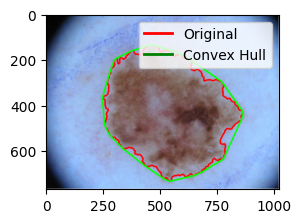

In [13]:
# Get the contour
malignant_cnt = extract_contour(malignant_seg_img)

# Simplify the contour using the convex hull
hull = cv2.convexHull(malignant_cnt)

# Draw the results
output_img = malignant_img.copy()
cv2.drawContours(output_img, [malignant_cnt], -1, (255, 0, 0), 5)
cv2.drawContours(output_img, [hull], -1, (0, 255, 0), 5)

# Show the results
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], color='red', linewidth=2, linestyle='-', label='Original')
line2 = mlines.Line2D([], [], color='green', linewidth=2, linestyle='-', label='Convex Hull')
plt.figure(figsize=(3,3))
plt.imshow(output_img)
plt.legend(handles=[line1, line2])
plt.show()

But how do we measure the similarity between the original contour and its convex hull? Since we know the contours are going to be relatively similar in their shape, we can compare them by taking the ratio of their perimeter. The more dissimilar the two shapes are, the further the ratio will be from 1. This relative measurement also helps us ensure that jaggedness does not depend on the size of the original contour.

To summarize, we will measure the jaggedness of the skin lesion by taking the ratio between the perimeter of its convex hull over the perimeter of its original contour. The more jagged the shape, the lower this ratio will be.

In [14]:
def compute_border(cnt):
    """
    Compute the jaggedness of the skin lesion's border by comparing the
    perimeter of the actual border to the perimeter of the convex hull
    cnt: the contour of the skin lesion
    """
    # Compute the perimeter
    perimeter = cv2.arcLength(cnt, True)

    # Calculate the convex hull
    hull = cv2.convexHull(cnt)

    # Compute the perimeter of the convex hull
    simplified_perimeter = cv2.arcLength(hull, True)

    # Return the ratio between the two
    return simplified_perimeter / perimeter

## Asymmetry (A)

Unfortunately, `opencv` does not have a simple function we can use to quantify the symmetry of a contour. At a high level, bilateral asymmetry entails comparing to "halves" of a shape. Those halves are defined by a straight line that runs through the "middle" of the shape. While this concept is relatively simple to describe in words, implementing it in code will be our most complicated exercise so far.

We will start by first identifying an axis of symmetry. We can do this by fitting our contour to an ellipse and then extracting the ellipse's major axis. We can define a line according to a single point and an angle; in this case, the point will be the ellipse's center and the orientation of the ellipse will dictate the angle:

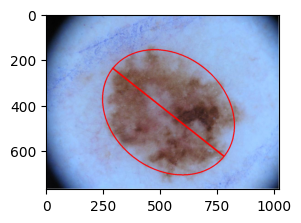

In [15]:
import math
# Get the contour
malignant_cnt = extract_contour(malignant_seg_img)

# Fit it to an ellipse
ellipse = cv2.fitEllipse(malignant_cnt)

# Draw the fitted ellipse on the image
output_img = malignant_img.copy()
cv2.ellipse(output_img, ellipse, (255, 0, 0), 3)

# Draw a line through the major axis
center, (major_axis, minor_axis), angle = ellipse
angle_rad = (angle-90) * (math.pi / 180)
x1 = int(center[0] - minor_axis / 2 * math.cos(angle_rad))
y1 = int(center[1] - minor_axis / 2 * math.sin(angle_rad))
x2 = int(center[0] + minor_axis / 2 * math.cos(angle_rad))
y2 = int(center[1] + minor_axis / 2 * math.sin(angle_rad))
cv2.line(output_img, (x1, y1), (x2, y2), (255, 0, 0), 5)

# Show the results
plt.figure(figsize=(3,3))
plt.imshow(output_img)
plt.show()

Now that we've established an axis for establishing symmetry, we need to compare the contour's shape on either side. We can do this by reflecting the shape over the line we have and then comparing the pre- and post-reflected shapes. The more asymmetric the contour is, then the more dissimilar the pre- and post-reflected shapes will appear. Let's write some helper function to help us reflect a contour over a line:

In [16]:
def flip_point(point, line_point, angle_deg):
    """
    A helper function that reflects a point over an arbitrary line
    This requires a lot of math, so don't worry if it's not intuitive
    point: the point we are trying to reflect
    line_point: a point that goes through the line
    angle_deg: the angle that defines the slope of the line
    """
    # Convert the angle from degrees to radians
    angle_rad = math.radians(angle_deg)

    # Calculate the coordinates of the point in a coordinate system where line_point is the origin
    translated_point = (point[0] - line_point[0], point[1] - line_point[1])

    # Rotate this coordinate system by an angle of -angle_rad
    rotated_point = (translated_point[0]*math.cos(angle_rad) + translated_point[1]*math.sin(angle_rad),
                     -translated_point[0]*math.sin(angle_rad) + translated_point[1]*math.cos(angle_rad))

    # Reflect the point over the x-axis
    reflected_point = (rotated_point[0], -rotated_point[1])

    # Rotate the coordinate system back by an angle of angle_rad and translate back to original coordinate system
    reflected_translated_back = (reflected_point[0]*math.cos(-angle_rad) + reflected_point[1]*math.sin(-angle_rad),
                                 -reflected_point[0]*math.sin(-angle_rad) + reflected_point[1]*math.cos(-angle_rad))
    final_point = (reflected_translated_back[0] + line_point[0], reflected_translated_back[1] + line_point[1])

    return final_point

In [17]:
def flip_contour(contour, center, angle_deg):
    """
    A helper function reflects an entire contour over its major axis
    contour: the contour
    center: the center of the contour's fit ellipse
    angle_deg: the angle of the contour's fit ellipse
    """
    # Create an array to store the flipped contour points
    flipped_contour = []

    # Flip each point in the contour
    for point in contour:
        flipped_point = flip_point(point[0], center, angle_deg)
        flipped_contour.append(flipped_point)

    # Convert the flipped contour list to an array
    flipped_contour = np.array(flipped_contour, dtype=np.int32).reshape(-1, 1, 2)

    return flipped_contour

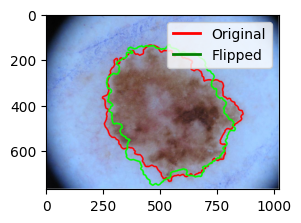

In [18]:
# Get the contour
malignant_cnt = extract_contour(malignant_seg_img)

# Get the min enclosing ellipse
center, axes, angle = cv2.fitEllipse(malignant_cnt)

# Rotate the contour so that it is upright
flipped_cnt = flip_contour(malignant_cnt, center, -angle)

# Draw the results
output_img = malignant_img.copy()
cv2.drawContours(output_img, [malignant_cnt], -1, (255, 0, 0), 5)
cv2.drawContours(output_img, [flipped_cnt], -1, (0, 255, 0), 5)

# Show the results
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], color='red', linewidth=2, linestyle='-', label='Original')
line2 = mlines.Line2D([], [], color='green', linewidth=2, linestyle='-', label='Flipped')
plt.figure(figsize=(3,3))
plt.imshow(output_img)
plt.legend(handles=[line1, line2])
plt.show()

To quantify the difference between the two contours, we are going to use a measurement called the Hausdorff distance. We are not going to concern ourselves with the details of this metric, but just know that such metrics exist:

In [19]:
from scipy.spatial.distance import cdist
def get_hausdorff_distance(cnt1, cnt2):
    """
    A helper function to compute the Haussdorf distance between two contours
    cnt2: the first contour
    cnt2: the second contour
    """
    pts1 = np.array(cnt1).squeeze()
    pts2 = np.array(cnt2).squeeze()
    distances = cdist(pts1, pts2)
    return np.max(np.min(distances, axis=0))

The Hausdorff distance is sensitive to the size of the contours (i.e., larger contours will have larger distances). Therefore, we will need to account for this confound if we want to compare the asymmetry of two differently sized skin lesions. For simplicity, we will do this by dividing the Hausdorff distance by the diameter of the skin lesion.

When it's all said and done, this is the function we will use to quantify the asymmetry of a skin lesion:

In [20]:
def compute_asymmetry(cnt):
    """
    Compute the asymmetry of the skin lesion by comparing the contour with a
    reflected version of itself
    cnt: the contour of the skin lesion
    """
    # Get the min enclosing ellipse
    center, axes, angle = cv2.fitEllipse(cnt)

    # Flip the contour of the ellipse's major axis
    flipped_cnt = flip_contour(cnt, center, -angle)

    # Measure the difference between the two contours as the Haussdorff distance
    distance = get_hausdorff_distance(cnt, flipped_cnt)

    # Scale the distance according to the diameter for fair comparison
    _, r = cv2.minEnclosingCircle(cnt)
    d = 2*r
    return distance / d

## Processing a Single Image

Now that we have helper functions to extract information from our images, let's put everything together into a single function. This function will take a single image as input and return all of the information calculated for that image as a `dict`.

In [21]:
def process_img(filename):
    """
    Process a skin lesion image and produce all of the features according to
    the ABCD(E) rule as a dictionary (one value per key)
    filename: the name of the skin lesion image without the file extension
    """
    # Get the contour filename
    rgb_filename = filename + '.jpg'
    seg_filename = filename + '_Segmentation.png'

    # Get both of the images (RGB and segmentation annotation)
    img = cv2.imread(os.path.join(image_folder, rgb_filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    seg_img = cv2.imread(os.path.join(segmentation_folder, seg_filename))
    seg_img = cv2.cvtColor(seg_img, cv2.COLOR_BGR2GRAY)

    # Get the contour
    cnt = extract_contour(seg_img)

    # Extract information from the image
    asymmetry = compute_asymmetry(cnt)
    border = compute_border(cnt)
    color = compute_color(img, seg_img)
    diameter = compute_diameter(cnt)

    # Combine everything into a dictionary
    info_dict = {'Asymmetry': asymmetry,
                 'Border': border,
                 'Color Stdev (H)': color[0],
                 'Color Stdev (S)': color[1],
                 'Color Stdev (V)': color[2],
                 'Diameter': diameter}
    return info_dict

In [22]:
# Test our function
filename = 'ISIC_0000000'
process_img(filename)

{'Asymmetry': 0.15912209787559223,
 'Border': 0.8855998923497005,
 'Color Stdev (H)': 59.185259074692965,
 'Color Stdev (S)': 14.431452122782797,
 'Color Stdev (V)': 41.800658125478854,
 'Diameter': 865.640380859375}

# Creating Our Processed Dataset

To process all of our images, we will iterate through all of the files and call our `process_image()` function on each image. We will gather the results in a single `DataFrame`. Running this will take some time since we have lots of images.

In [23]:
# Get all the filenames but remove the extension
img_filenames = os.listdir(image_folder)
img_filenames = sorted([f[:-4] for f in img_filenames])

# Iterate through the filenames
info_df = pd.DataFrame()
for img_filename in img_filenames:
    # Generate the features
    result_dict = process_img(img_filename)

    # Add the image name
    result_dict['Image Name'] = img_filename
    result_df = pd.DataFrame([result_dict])
    info_df = pd.concat([info_df, result_df], axis=0)

# Set the index to the image name
info_df.set_index(['Image Name'], inplace=True)
info_df

,Asymmetry,Border,Color Stdev (H),Color Stdev (S),Color Stdev (V),Diameter
Image Name,,,,,,
ISIC_0000000,0.159122,0.885600,59.185259,14.431452,41.800658,865.640381
ISIC_0000001,0.075846,0.812356,13.677680,24.662211,31.939610,296.289154
ISIC_0000002,0.097556,0.764212,76.004182,30.334656,23.293398,646.436462
ISIC_0000004,0.195895,0.945703,15.492200,37.513992,29.310808,677.091003
ISIC_0000006,0.122100,0.793236,45.392555,46.445115,15.968814,367.912750
...,...,...,...,...,...,...
ISIC_0011393,0.142014,0.756491,1.578460,14.104356,17.272032,251.335861
ISIC_0011397,0.108120,0.916415,2.375107,32.628716,18.408460,846.723877
ISIC_0011398,0.110216,0.946921,11.866703,38.599363,26.226656,717.462463


The diagnosis associated with each image is provided in a `.csv` file. Let's load it and see what it looks like:

In [24]:
diagnosis_df = pd.read_csv(diagnosis_filename, header=None)
diagnosis_df.rename(columns={0: 'Image Name', 1: 'Diagnosis'}, inplace=True)
diagnosis_df.set_index(['Image Name'], inplace=True)
diagnosis_df

,Diagnosis
Image Name,
ISIC_0000000,benign
ISIC_0000001,benign
ISIC_0000002,malignant
ISIC_0000004,malignant
ISIC_0000006,benign
...,...
ISIC_0011393,benign
ISIC_0011397,benign
ISIC_0011398,benign


The index of this `DataFrame` is the name of each image file (without the extension), and the `DataFrame` has a lone column indicating the diagnosis associated with each image.

We now have two `DataFrames`:
1. `info_df`, which holds all of the characteristics we have extracted from our images
2. `diagnosis_df`, which holds the diagnoses associated with our images

To combine them together, we can use the function `pd.merge()`, which combines the information across two `DataFrames` according to a shared index or column. Since we have set the index of each `DataFrame` to be the image name, we can use this column as our reference for merging.

In [25]:
df = pd.merge(info_df, diagnosis_df, left_index=True, right_index=True)
df

,Asymmetry,Border,Color Stdev (H),Color Stdev (S),Color Stdev (V),Diameter,Diagnosis
Image Name,,,,,,,
ISIC_0000000,0.159122,0.885600,59.185259,14.431452,41.800658,865.640381,benign
ISIC_0000001,0.075846,0.812356,13.677680,24.662211,31.939610,296.289154,benign
ISIC_0000002,0.097556,0.764212,76.004182,30.334656,23.293398,646.436462,malignant
ISIC_0000004,0.195895,0.945703,15.492200,37.513992,29.310808,677.091003,malignant
ISIC_0000006,0.122100,0.793236,45.392555,46.445115,15.968814,367.912750,benign
...,...,...,...,...,...,...,...
ISIC_0011393,0.142014,0.756491,1.578460,14.104356,17.272032,251.335861,benign
ISIC_0011397,0.108120,0.916415,2.375107,32.628716,18.408460,846.723877,benign
ISIC_0011398,0.110216,0.946921,11.866703,38.599363,26.226656,717.462463,benign


# Exploring Our Image Characteristics

At this point, you could export your `DataFrame` into a `.csv` and explore the image characteristics using any tool that you desire (e.g., R, Excel). Nevertheless, we're going to stick with Python to explore our processed dataset.

To make it easy for us to test all of the relevant columns in our `DataFrame`, we will generate a list that holds all of the names of our image metrics:

In [26]:
metrics = list(info_df.columns)
metrics

['Asymmetry',
 'Border',
 'Color Stdev (H)',
 'Color Stdev (S)',
 'Color Stdev (V)',
 'Diameter']

## Descriptive Statistics

Let's start by extracting some descriptive statistics from our data. We can use the `.describe()` method to compute statistics like the mean and range for each column in our entire `DataFrame`:

In [27]:
df.describe()

,Asymmetry,Border,Color Stdev (H),Color Stdev (S),Color Stdev (V),Diameter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.170288,0.874608,17.722109,32.383651,22.773821,804.059440
std,0.776169,0.092464,23.161959,10.078334,12.752241,455.784813
min,0.010889,0.378194,0.604953,9.484221,1.908164,10.078022
25%,0.089633,0.814216,2.094768,24.840837,13.188053,490.791008
50%,0.120539,0.918576,5.275049,31.681962,20.285101,733.211304
75%,0.169047,0.946709,25.730926,38.780379,30.668206,987.372726
max,20.150779,0.999859,88.337152,78.079880,63.887785,3715.473877


Using these results, we can get a sanity check of whether the values we are calculating follow our expectations. Here are some two example observations:
* **Border**: All of these values are under 1, which makes sense since a contour should never be larger than its convex hull. Furthermore, over 75% of these values are above 0.81, which makes sense since we don't expect skin lesions to have too much jaggedness.
* **Diameter**: At least 75% of these values are under 1022 px, which makes sense since that is the widest dimension of our images. However, notice how the largest diameter value is 3715 px. That's it is odd that we have a measurement


While these observations are useful for verifying that our image processing techniques are working as expected, they don't tell us much about whether the characteristics we have calculated are useful for our target task: discerning benign skin lesions from malignant ones.

One way we can do that is by splitting our `DataFrame` into two halves: one that contains the benign cases and another that contains the malignant cases. We can call the `.describe()` method on these `DataFrames` individually to see how they differ.

In [28]:
benign_df = df[df['Diagnosis'] == 'benign']
benign_df.describe()

,Asymmetry,Border,Color Stdev (H),Color Stdev (S),Color Stdev (V),Diameter
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,0.158404,0.874717,15.621696,31.983836,22.092900,765.002604
std,0.745042,0.089885,21.708640,9.854940,12.492394,405.211701
min,0.010889,0.521785,0.604953,9.484221,1.908164,11.401955
25%,0.088158,0.814106,1.934078,24.543067,12.303081,465.325363
50%,0.117953,0.916147,4.604305,31.582528,19.483472,717.950439
75%,0.163312,0.946977,19.341423,38.372797,29.893193,959.990967
max,20.150779,0.999859,88.337152,78.079880,63.276288,3278.806396


In [29]:
malignant_df = df[df['Diagnosis'] == 'malignant']
malignant_df.describe()

,Asymmetry,Border,Color Stdev (H),Color Stdev (S),Color Stdev (V),Diameter
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,0.220229,0.874148,26.548700,34.063799,25.635263,968.188453
std,0.895934,0.102877,26.792517,10.837163,13.455788,599.331395
min,0.034189,0.378194,0.994927,12.118004,5.764700,10.078022
25%,0.097187,0.814686,3.551002,26.716056,14.742353,561.495483
50%,0.135070,0.924985,14.035268,31.995251,22.593751,798.960754
75%,0.182484,0.945398,48.071669,40.926296,33.496162,1235.308716
max,11.870294,0.998309,84.243908,67.434611,63.887785,3715.473877


While splitting up the dataset in this way did not take much effort, there is a convenient method we can use called `.groupby()`. This method allows us to aggregate our data into groups according to one column and then apply another operation like `.describe()` on those groups independently. You will notice that the structure of this `DataFrame` will be very different, using tiered columns to report the results.

In [30]:
df.groupby('Diagnosis').describe()

Asymmetry                                                    \
              count      mean       std       min       25%       50%   
Diagnosis                                                               
benign        727.0  0.158404  0.745042  0.010889  0.088158  0.117953   
malignant     173.0  0.220229  0.895934  0.034189  0.097187  0.135070   

                               Border            ... Color Stdev (V)  \
                75%        max  count      mean  ...             75%   
Diagnosis                                        ...                   
benign     0.163312  20.150779  727.0  0.874717  ...       29.893193   
malignant  0.182484  11.870294  173.0  0.874148  ...       33.496162   

                     Diameter                                                 \
                 max    count        mean         std        min         25%   
Diagnosis                                                                      
benign     63.276288    727.0  765.002604  405.211701  11.401955  465.325363   
malignant  63.887785    173.0  968.188453  599.331395  10.078022  561.495483   

                                                 
                  50%          75%          max  
Diagnosis                                        
benign     717.950439   959.990967  3278.806396  
malignant  798.960754  1235.308716  3715.473877  

[2 rows x 48 columns]

In [31]:
for col in metrics:
    print(col)
    print(df.groupby('Diagnosis').describe()[col])
    print('-----------------')

Asymmetry
           count      mean       std       min       25%       50%       75%  \
Diagnosis                                                                      
benign     727.0  0.158404  0.745042  0.010889  0.088158  0.117953  0.163312   
malignant  173.0  0.220229  0.895934  0.034189  0.097187  0.135070  0.182484   

                 max  
Diagnosis             
benign     20.150779  
malignant  11.870294  
-----------------
Border
           count      mean       std       min       25%       50%       75%  \
Diagnosis                                                                      
benign     727.0  0.874717  0.089885  0.521785  0.814106  0.916147  0.946977   
malignant  173.0  0.874148  0.102877  0.378194  0.814686  0.924985  0.945398   

                max  
Diagnosis            
benign     0.999859  
malignant  0.998309  
-----------------
Color Stdev (H)
           count       mean        std       min       25%        50%  \
Diagnosis                           

So what can we learn from looking at these numbers? Here are some example observations:
* **Asymmetry:** According to multiple metrics (mean, 25%-75% percentile), it seems like the asymmetry scores of the malignant skin lesions tends to be higher than those of the benign skin lesions. This is something that we wanted to see, although we don't know whether it's significant or not.
* **Diameter:** Similar observations can be made about the diameter as malignant skin lesions tended to be larger.

## Histograms

Although descriptive statistics can distill a lot of data into a small handful of numbers, they can also hide important information about the distribution of our data. Therefore, it can be helpful to generate histograms of our image characteristics.

We're going to jump straight into generating separate histograms for benign and malignant skin lesions. The most intuitive way of doing this is by calling the requisite `matplotlib` functions on our manually split `DataFrames`:

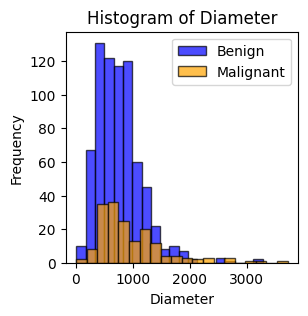

In [32]:
plt.figure(figsize=(3,3))
plt.hist(benign_df['Diameter'], bins=20, color='blue', edgecolor='black',
         alpha=0.7, label='Benign')
plt.hist(malignant_df['Diameter'], bins=20, color='orange', edgecolor='black',
         alpha=0.7, label='Malignant')
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Diameter')
plt.show()

If you are interested in shortcuts, `pandas` has built-in methods for generating histograms on `Series`. The code block below showcases this method, and we have run it on all of our columns to see the results.

In [33]:
def compare_histograms(df, col):
    plt.figure(figsize=(3,3))
    grouped_df = df.groupby('Diagnosis')[col]
    grouped_df.plot.hist(bins=20, alpha=0.7, legend=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

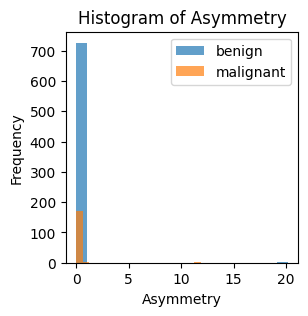

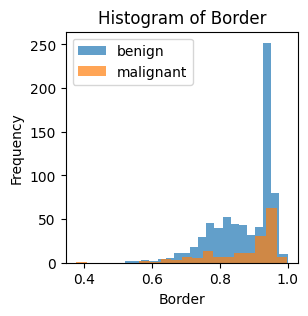

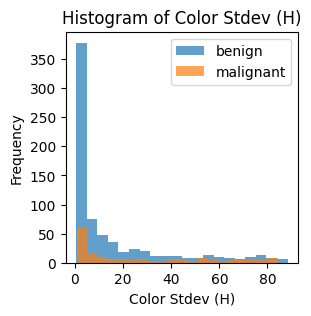

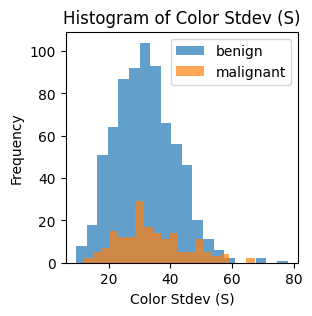

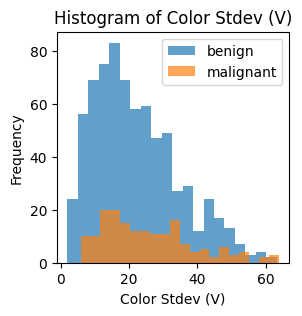

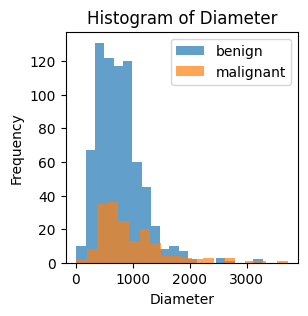

In [34]:
for col in metrics:
    compare_histograms(df, col)

There is plenty we could do to make these graphs more informative (e.g., a couple of large outliers in the asymmetry scores is skewing those histograms). Still, these graphs can help us better appreciate the values we have calculated.

## Statistical Tests

So far, we have been eyeballing the differences between our distributions. If we want to be more confident about whether these differences are meaningful, we can turn to statistical testing.

The `scipy` package provides an assortment of statistical tests you may be familiar with from other courses. Since we are comparing two distributions of the same outcome variable, we will want to use a ***t-test*** if the data is normally distributed or a ***Mann-Whitney U test*** if the data is not normally distributed. To determine whether the data is normally distributed, we will use D'Agostino's K$^2$, but there are other alternatives that have their own tradeoffs.

The function below checks the normality of the data in a given column and then applies the corresponding test of differences across the benign and malignant skin lesions.

In [35]:
from scipy import stats

def compare_distributions(df, col):
    # Get the relevant data
    data = df[col]
    benign_data = df[df['Diagnosis'] == 'benign'][col]
    malignant_data = df[df['Diagnosis'] == 'malignant'][col]

    # Check of the data is normally distributed
    statistic, p_value = stats.normaltest(data)
    test = None
    if p_value > 0.05:
        # Data is normally distributed, use t-test
        test = 't-test'
        statistic, p_value = stats.ttest_ind(benign_data, malignant_data)
    else:
        # Data is not normally distributed, use Mann-Whitney U Test
        test = 'Mann-Whitney U test'
        statistic, p_value = stats.mannwhitneyu(benign_data, malignant_data)

    print(f'Result of {test} for {col}: {statistic}, p-value is {p_value:0.3f}')

In [36]:
for col in metrics:
    compare_distributions(df, col)

Result of Mann-Whitney U test for Asymmetry: 53510.0, p-value is 0.002
Result of Mann-Whitney U test for Border: 63671.0, p-value is 0.798
Result of Mann-Whitney U test for Color Stdev (H): 44395.0, p-value is 0.000
Result of Mann-Whitney U test for Color Stdev (S): 56835.0, p-value is 0.049
Result of Mann-Whitney U test for Color Stdev (V): 53362.0, p-value is 0.002
Result of Mann-Whitney U test for Diameter: 50584.5, p-value is 0.000


Here are some example observations:
* **Asymmetry and Diameter:** The differences we observed earlier are statistically significant.
* **Color Stdev (H, V):** We haven't commented on the color dimensions yet, but we also have some statistically significant differences here too. Looking at the descriptive statistics from earlier, we can see that the color variation in malignant skin lesions tends to be higher as expected.

All in all, we can see some promising results here for trying to discriminate benign skin lesions from malignant ones! In the near future, we will see how these insights will be useful for developing a machine learning model to achieve that very task.